# Guia 4

## Ejercicio 1

Implemente el algoritmo de entrenamiento de un SOM bidimensional de forma que se pueda ver gráficamente el mapa topológico durante todo el proceso. Para poder observar el ordenamiento topológico, en el mapa grafique líneas de unión entre pares de neuronas vecinas. Realice las pruebas de ordenamiento topológico con los patrones provistos en los archivo `circulo.csv` y `te.csv`, usando un máximo de 1000 épocas de entrenamiento. Dichos datos fueron generados aleatoriamente con distribución uniforme dentro de un círculo de radio 1 centrado en el origen y una **T** como muestra la figura.

Para cada distribución grafique los datos de entrenamiento coloreando cada punto según la neurona ganadora correspondiente, y agregue el centroide de cada neurona con otro marcador.

Repita el entrenamiento con los datos en **T** pero para un SOM unidimensional con la misma cantidad de neuronas.

### Entrenamiento

Se usaron SOM's 2D de
- 10 neuronas por lado
- 5 neuronas por lado
- 2 neuronas por lado

Y SOM's 1D de
- 100 neuronas [TODO]
- 25 neuronas [TODO]
- 4 neuronas [TODO]

#### Dataset Te

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from Som import Som
from Som1D import Som1D

def cargarCSV(csvRelativePath, delimeter = ',') -> np.ndarray[any]:
    this_folder = os.path.abspath('') 
    fullPath = os.path.join(this_folder, csvRelativePath)
    return np.loadtxt(fullPath, dtype=float, delimiter=delimeter)

data = cargarCSV('./data/te.csv')

som2d10 = Som(
    N=10,
    vecindades=[(5,5), (4,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
som2d5 = Som(
    N=5,
    vecindades=[(3,3), (2,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
som2d2 = Som(
    N=2,
    vecindades=[(3,3), (2,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
som1d100 = Som(
    N=100,
    vecindades=[(50,50), (40,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
som1d25 = Som(
    N=25,
    vecindades=[(10,10), (9,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
som1d4 = Som(
    N=4,
    vecindades=[(2,2), (1,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)

w_etapas2d10 = som2d10.entrenar(data)
w_etapas2d5 = som2d5.entrenar(data)
w_etapas2d2 = som2d2.entrenar(data)
w_etapas1d100 = som1d100.entrenar(data)
w_etapas1d25 = som1d25.entrenar(data)
w_etapas1d4 = som1d4.entrenar(data)

In [2]:
# Graficar
def graphEtapas(som: Som, w_etapas: list[np.ndarray[float]]):
    fig, ax = plt.subplots(1,len(w_etapas))
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i in range(len(w_etapas)):
        ax[i].set_title(f"Etapa {i}. η=[{som.η[i][0]},{som.η[i][1]}];\n epocas={som.epocas[i]};\n vecinos=[{som.vecindades[i][0]},{som.vecindades[i][1]}]")
        ax[i].grid()
        ax[i].scatter(data[:,0],data[:,1], marker='x', c='grey')
        ax[i].scatter(w_etapas[i][:,:,0], w_etapas[i][:,:,1], marker='o')
        for n in range(som.N):
            ax[i].plot(w_etapas[i][n,:,0], w_etapas[i][n,:,1], c='r')
            ax[i].plot(w_etapas[i][:,n,0], w_etapas[i][:,n,1], c='r')

def graphEtapas1D(som: Som1D, w_etapas: list[np.ndarray[float]]):
    fig, ax = plt.subplots(1,len(w_etapas))
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, W in enumerate(w_etapas):
        ax[i].set_title(f"Etapa {i}. η=[{som.η[i][0]},{som.η[i][1]}];\nepocas={som.epocas[i]};\n vecinos=[{som.vecindades[i][0]},{som.vecindades[i][1]}]")
        ax[i].grid()
        ax[i].scatter(data[:,0],data[:,1], marker='x', c='grey')
        ax[i].plot(W[:,0], W[:,1], 'o-', lw=2, c='r')

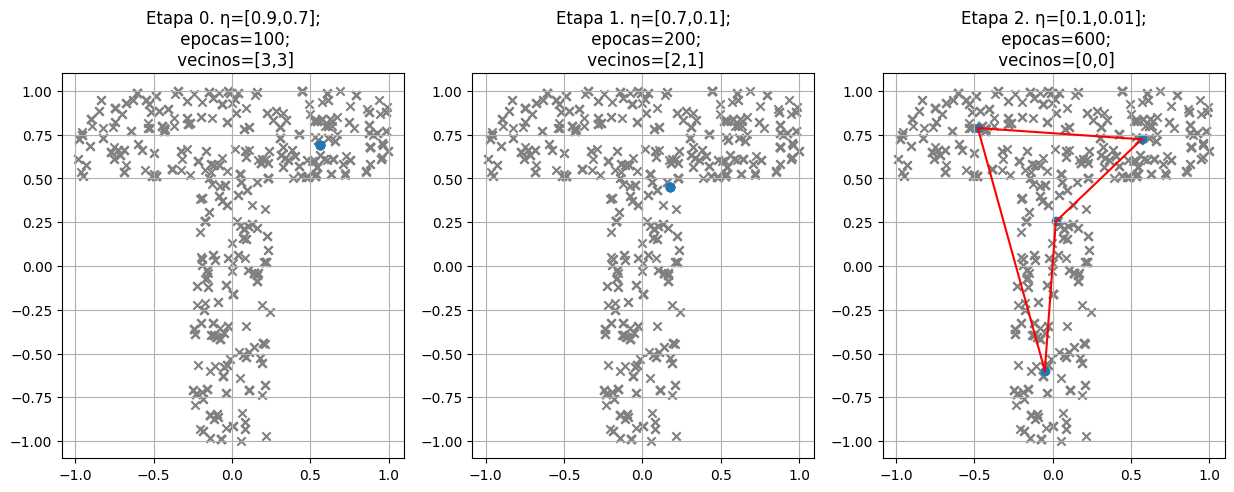

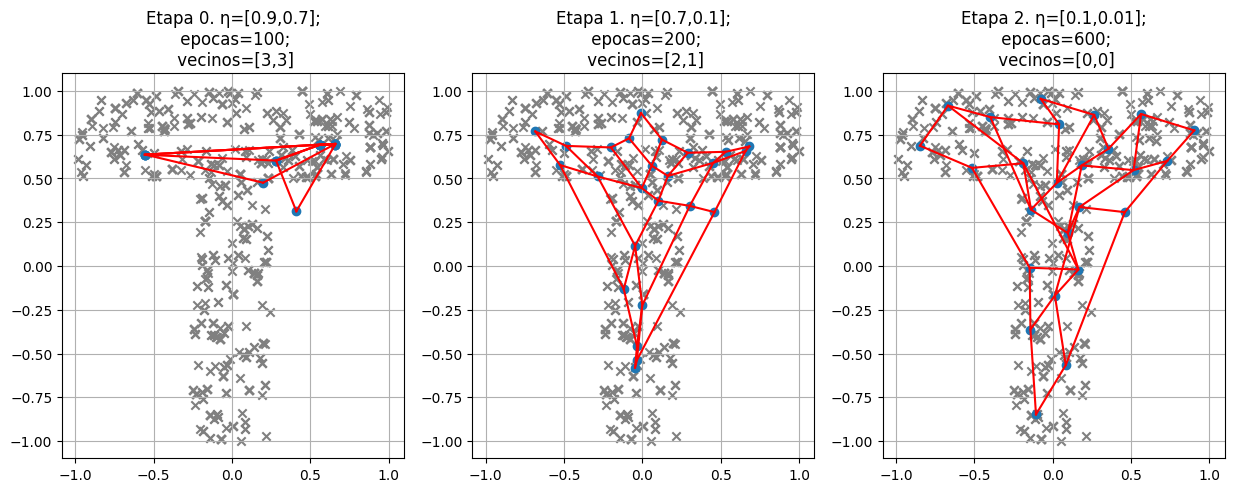

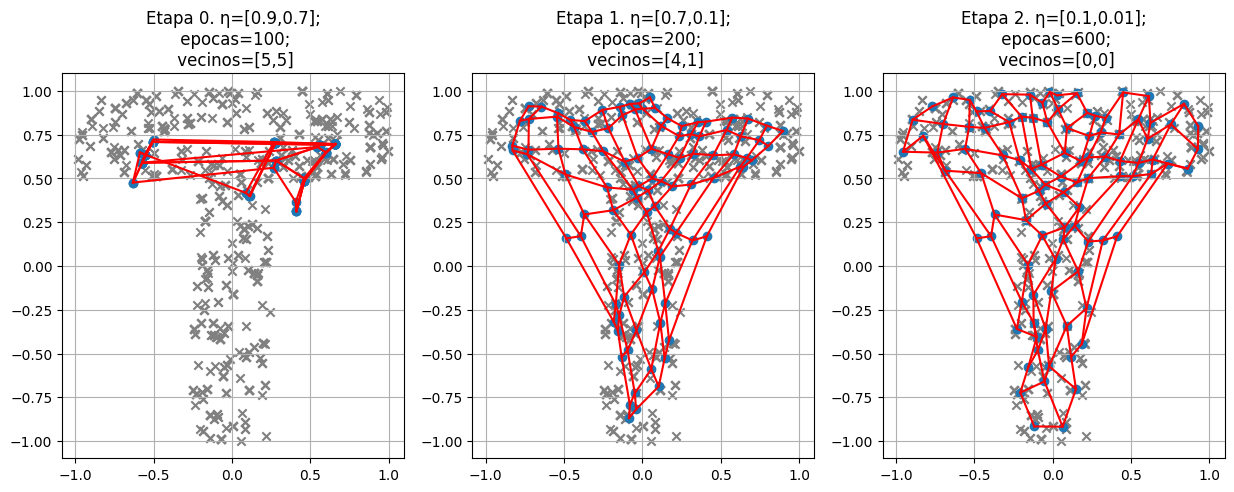

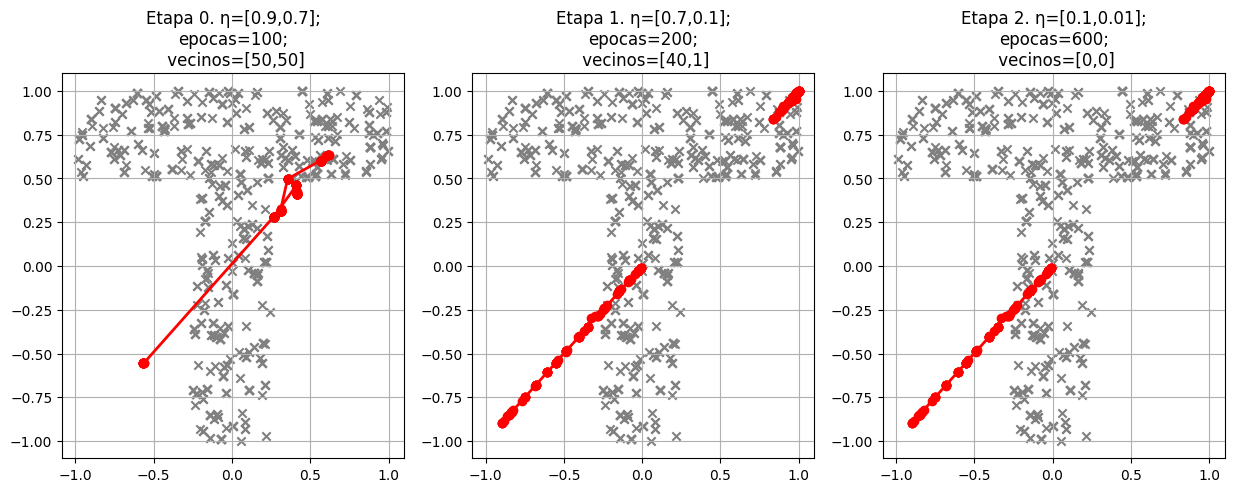

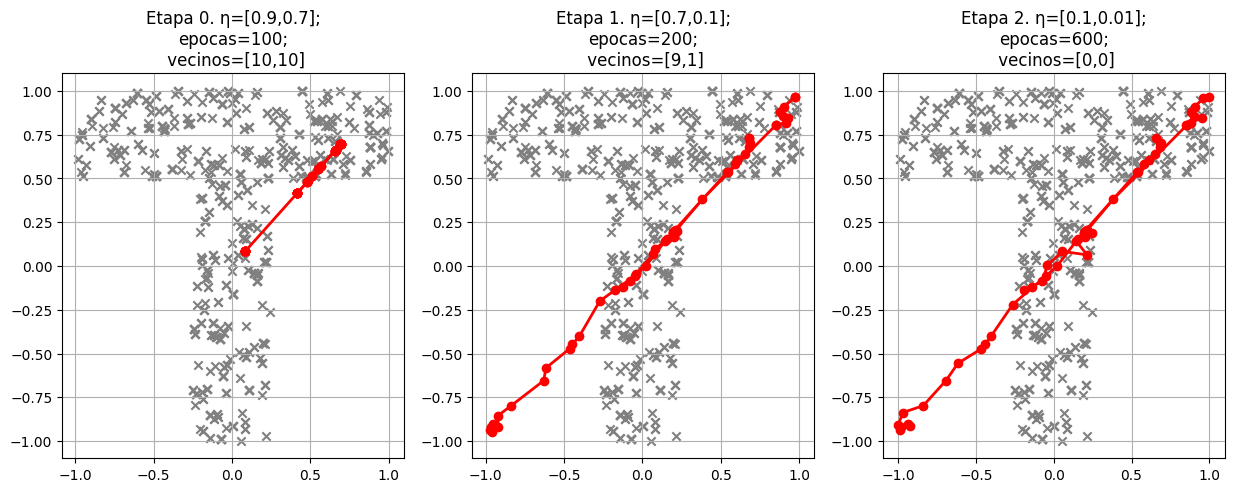

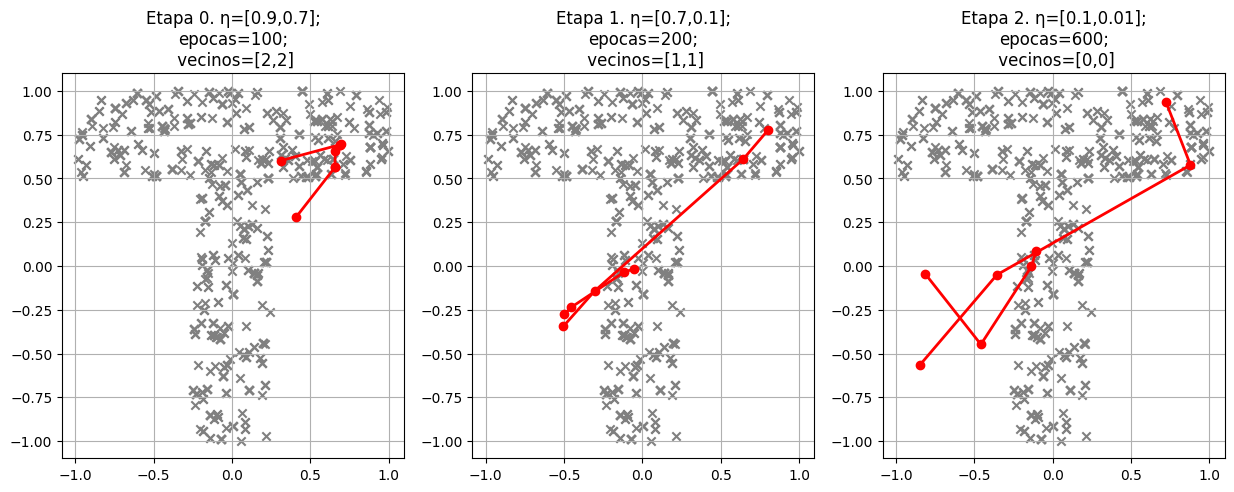

In [3]:
graphEtapas(som2d2, w_etapas2d2)
graphEtapas(som2d5, w_etapas2d5)
graphEtapas(som2d10, w_etapas2d10)
graphEtapas1D(som1d100, w_etapas1d100)
graphEtapas1D(som1d25, w_etapas1d25)
graphEtapas1D(som1d4, w_etapas1d4)

#### Dataset Circulo

In [4]:
data = cargarCSV('./data/circulo.csv')

som2d10 = Som(
    N=10,
    vecindades=[(5,5), (4,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
som2d5 = Som(
    N=5,
    vecindades=[(3,3), (2,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
som2d2 = Som(
    N=2,
    vecindades=[(3,3), (2,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
som1d100 = Som(
    N=100,
    vecindades=[(50,50), (40,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
som1d25 = Som(
    N=25,
    vecindades=[(10,10), (9,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
som1d4 = Som(
    N=4,
    vecindades=[(2,2), (1,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)

w_etapas2d10 = som2d10.entrenar(data)
w_etapas2d5 = som2d5.entrenar(data)
w_etapas2d2 = som2d2.entrenar(data)
w_etapas1d100 = som1d100.entrenar(data)
w_etapas1d25 = som1d25.entrenar(data)
w_etapas1d4 = som1d4.entrenar(data)

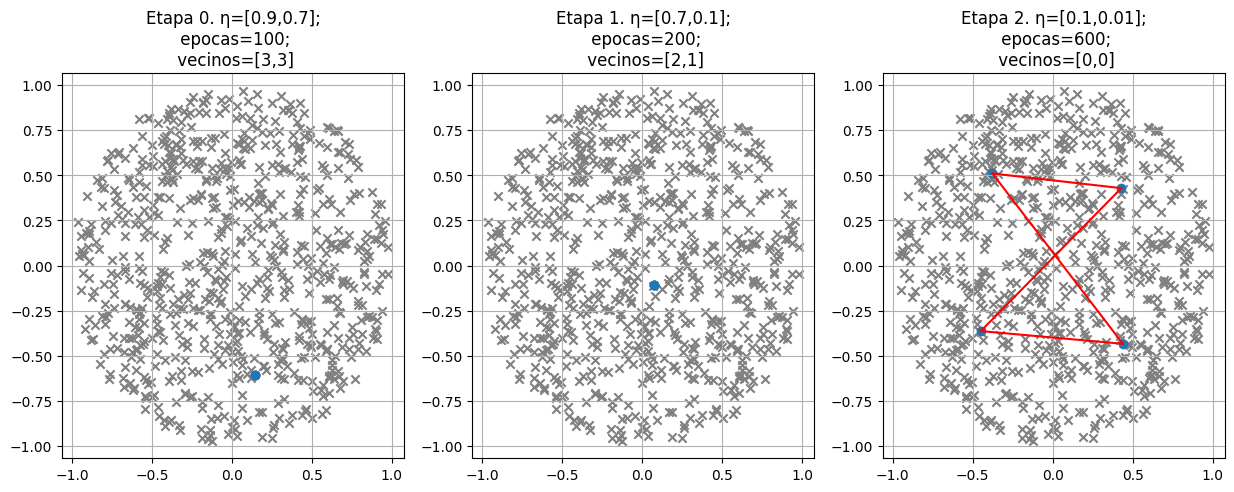

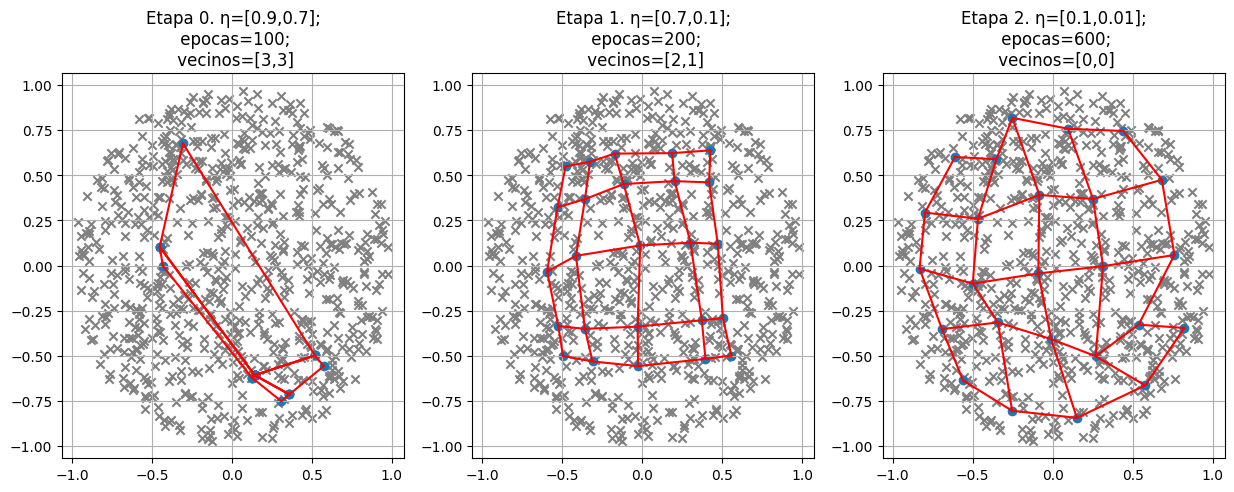

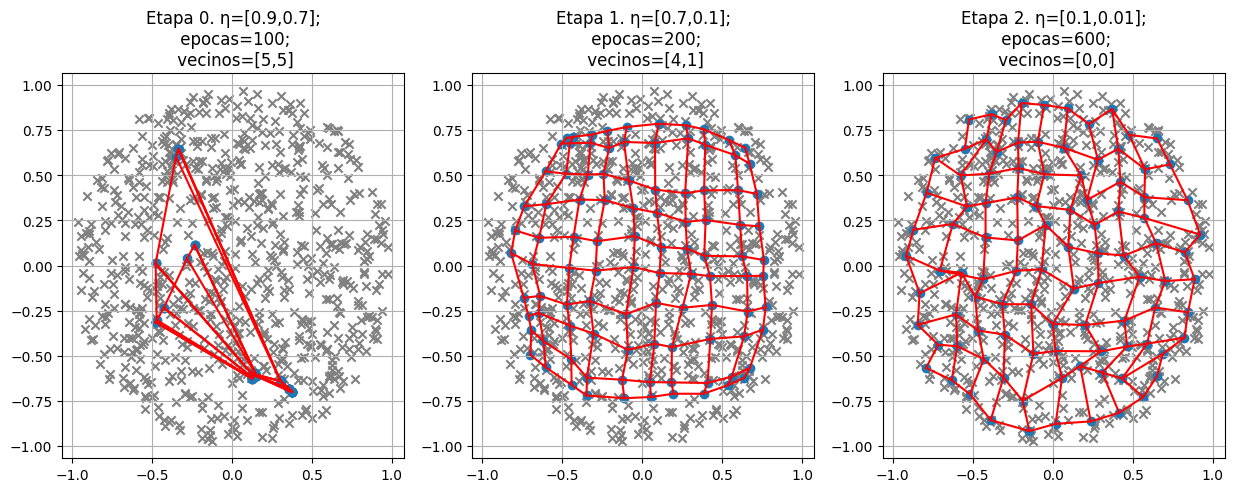

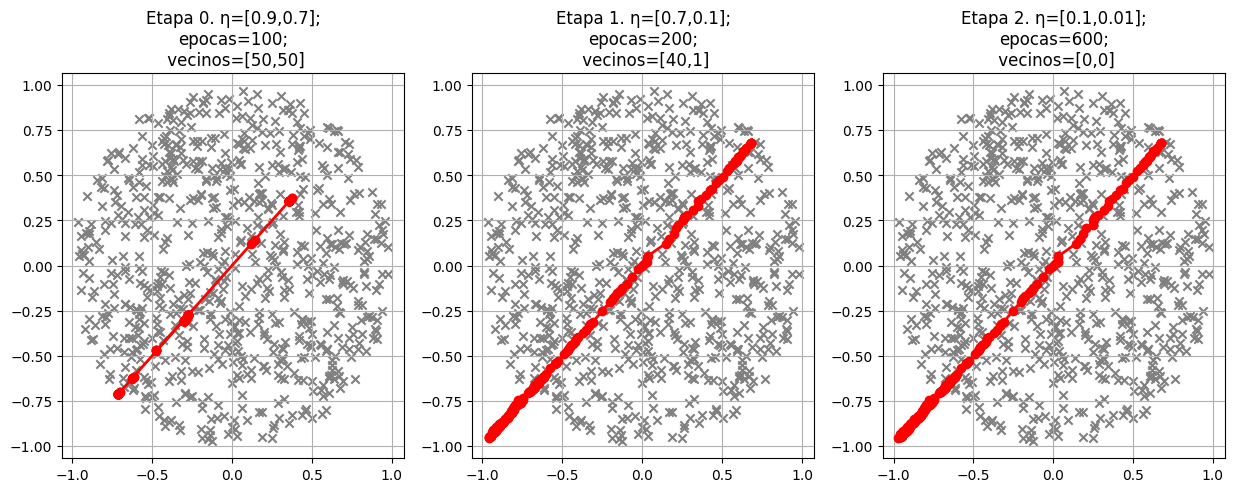

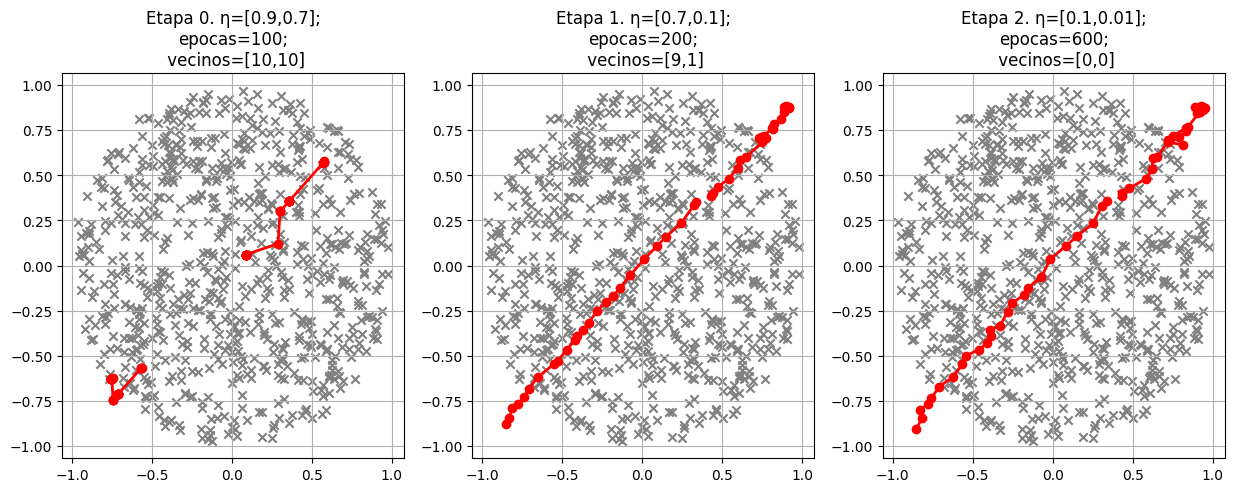

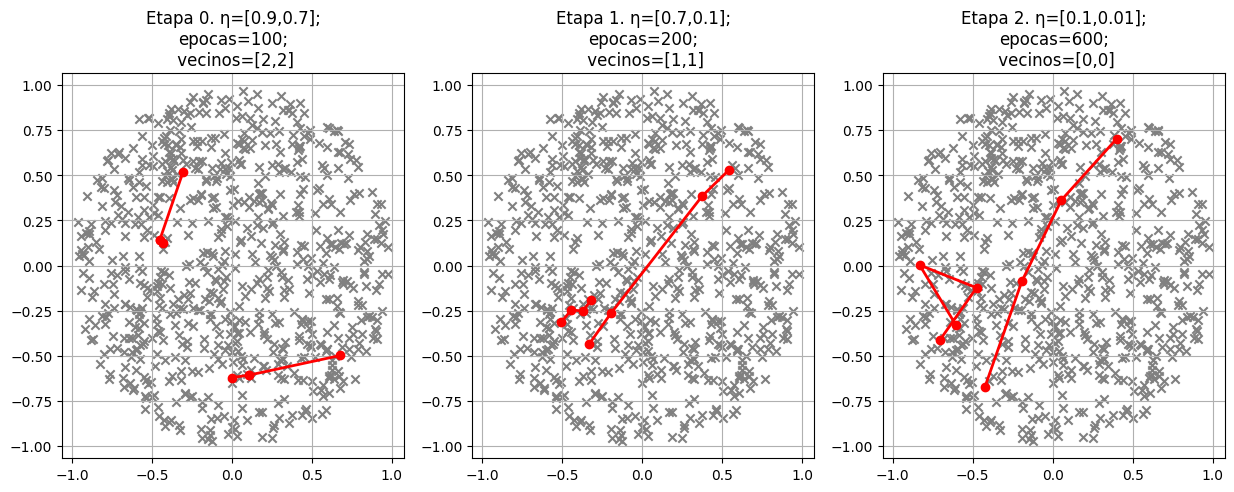

In [5]:
graphEtapas(som2d2, w_etapas2d2)
graphEtapas(som2d5, w_etapas2d5)
graphEtapas(som2d10, w_etapas2d10)
graphEtapas1D(som1d100, w_etapas1d100)
graphEtapas1D(som1d25, w_etapas1d25)
graphEtapas1D(som1d4, w_etapas1d4)